In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 198 kB 36.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=bed182d451451aedc9b6a5c0edbdc0fa2c8475147e37e4c939b6663bc3a30955
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
spark = SparkSession.builder.appName('logregconsult').getOrCreate()

In [ ]:
data = spark.read.csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',inferSchema=True, header=True)
data.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [ ]:
a=data.count()
a

7043

In [ ]:
data.describe().show()

+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-------------------+
|summary|customerID|gender|     SeniorCitizen|Partner|Dependents|            tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|    MonthlyCharges|      TotalCharges|              Churn|
+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-------------------+
|  count|      7043|  7043| 

In [ ]:
data.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: integer (nullable = true)



In [ ]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col
data = data.withColumn("TotalCharges",data.TotalCharges.cast('double'))

In [ ]:
data.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [ ]:
for col in data.columns:
    print(col,':',data.filter(data[col].isNull()).count())

customerID : 0
gender : 0
SeniorCitizen : 0
Partner : 0
Dependents : 0
tenure : 0
PhoneService : 0
MultipleLines : 0
InternetService : 0
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
TechSupport : 0
StreamingTV : 0
StreamingMovies : 0
Contract : 0
PaperlessBilling : 0
PaymentMethod : 0
MonthlyCharges : 0
TotalCharges : 10
Churn : 0


In [ ]:
# filling the missing values with  0

data = data.fillna(value=0, subset=['TotalCharges'])
data.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|  

In [ ]:
# No any missing values

for col in data.columns:
    print(col,':',data.filter(data[col].isNull()).count())

customerID : 0
gender : 0
SeniorCitizen : 0
Partner : 0
Dependents : 0
tenure : 0
PhoneService : 0
MultipleLines : 0
InternetService : 0
OnlineSecurity : 0
OnlineBackup : 0
DeviceProtection : 0
TechSupport : 0
StreamingTV : 0
StreamingMovies : 0
Contract : 0
PaperlessBilling : 0
PaymentMethod : 0
MonthlyCharges : 0
TotalCharges : 0
Churn : 0


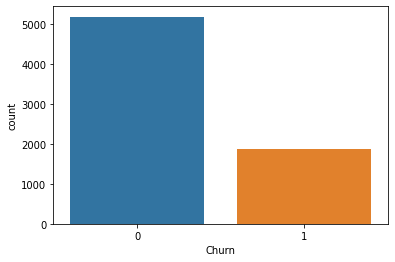

In [ ]:
total_customers = sns.countplot(x="Churn", data=data.toPandas())

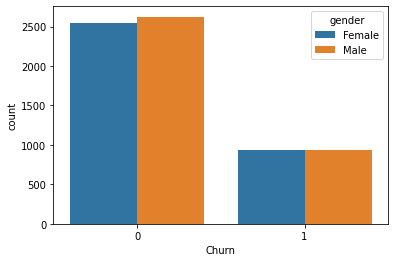

In [ ]:
genders_churned = sns.countplot(x="Churn", hue="gender",data=data.toPandas())

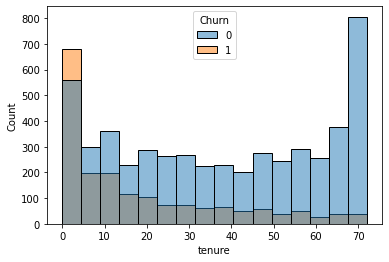

In [ ]:
sns.histplot(data=data.toPandas(), x="tenure", hue="Churn")

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
assembler1 = VectorAssembler(inputCols=['tenure', 'MonthlyCharges'],outputCol='features')

In [ ]:
df = assembler1.transform(data)
df

DataFrame[customerID: string, gender: string, SeniorCitizen: int, Partner: string, Dependents: string, tenure: int, PhoneService: string, MultipleLines: string, InternetService: string, OnlineSecurity: string, OnlineBackup: string, DeviceProtection: string, TechSupport: string, StreamingTV: string, StreamingMovies: string, Contract: string, PaperlessBilling: string, PaymentMethod: string, MonthlyCharges: double, TotalCharges: string, Churn: int, features: vector]

In [ ]:
final_data = df.select('features','Churn')
final_data

DataFrame[features: vector, Churn: int]

In [ ]:
training_df,test_df=final_data.randomSplit([0.70,0.3])

#import the logistic regression 
from pyspark.ml.classification import LogisticRegression

#Apply the logistic regression model
log_reg=LogisticRegression(labelCol='Churn').fit(training_df)

print("Train Results")

#Training Results
train_results=log_reg.evaluate(training_df).predictions
train_results.show()

print("Test Results")

test_results=log_reg.evaluate(test_df).predictions
test_results.show()

Train Results


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+-----------+-----+--------------------+--------------------+----------+
|   features|Churn|       rawPrediction|         probability|prediction|
+-----------+-----+--------------------+--------------------+----------+
| [0.0,19.7]|    0|[1.15500485098939...|[0.76042388574018...|       0.0|
| [0.0,20.0]|    0|[1.14487560842651...|[0.75857368158229...|       0.0|
|[0.0,20.25]|    0|[1.13643457295745...|[0.75702442102767...|       0.0|
|[0.0,25.35]|    0|[0.96423744938854...|[0.72396941043676...|       0.0|
|[0.0,25.75]|    0|[0.95073179263804...|[0.72126232361756...|       0.0|
|[0.0,52.55]|    0|[0.04585279035437...|[0.51146118958367...|       0.0|
| [0.0,61.9]|    0|[-0.2698419361886...|[0.43294589988124...|       1.0|
|[0.0,73.35]|    0|[-0.6564413606717...|[0.34153946298256...|       1.0|
|[0.0,80.85]|    0|[-0.9096724247436...|[0.28706687395407...|       1.0|
| [1.0,18.8]|    0|[1.24150781111136...|[0.77582636156251...|       0.0|
|[1.0,18.85]|    0|[1.23981960401755...|[0.77553261

In [ ]:
test_results.select(["Churn","prediction"]).show()

+-----+----------+
|Churn|prediction|
+-----+----------+
|    0|       0.0|
|    0|       1.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    1|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    1|       0.0|
+-----+----------+
only showing top 20 rows



In [ ]:
#true positive
tp = test_results[(test_results.Churn==1) & (test_results.prediction==1)].count()
tp

196

In [ ]:
#true negative
tn = test_results[(test_results.Churn==0) & (test_results.prediction==0)].count()
tn

1239

In [ ]:
#false positive
fp = test_results[(test_results.Churn==0) & (test_results.prediction==1)].count()
fp

126

In [ ]:
accuracy = float((tp+tn)/test_results.count())
accuracy

0.7850109409190372